Hello! My Name is Sandesh Khanal and My student id is 3098971

This is "The AI Doctor" (Heart Disease Prediction).

The Source: Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

The Goal: Predict if a patient has heart disease based on medical stats (Blood Pressure, Cholesterol, Max Heart Rate).

# 1. Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a public stable URL
url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
df = pd.read_csv(url)

print(f"Patients Loaded: {df.shape[0]}")


Patients Loaded: 303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 2. Data cleaning

In [7]:
# Rename columns so that anyone can understand
df.columns = ['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol', 'fasting_sugar',
              'ecg_result', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'slope', 'major_vessels', 'thal', 'target']

df.head()

,age,sex,chest_pain,blood_pressure,cholesterol,fasting_sugar,ecg_result,max_heart_rate,exercise_angina,oldpeak,slope,major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Check for missing values
print("Missing Data:", df.isnull().sum().sum())

Missing Data: 0


In [5]:
# Check Balance
print("\nPatient Balance (1=Disease, 0=Healthy):")
print(df['target'].value_counts())


Patient Balance (1=Disease, 0=Healthy):
target
1    165
0    138
Name: count, dtype: int64


# 3. Feature Engineering

In [8]:
# Convert 'Chest Pain' from one column (0,1,2,3) into 4 separate columns (True/False)
# This helps the AI understand that these are Categories, not Numbers.
df = pd.get_dummies(df, columns=['chest_pain', 'thal'], drop_first=True)

print("Data after One-Hot Encoding (More columns now):")
df.head()

Data after One-Hot Encoding (More columns now):


,age,sex,blood_pressure,cholesterol,fasting_sugar,ecg_result,max_heart_rate,exercise_angina,oldpeak,slope,major_vessels,target,chest_pain_1,chest_pain_2,chest_pain_3,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,False,False,True,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,0,1,False,True,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,2,0,1,True,False,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,2,0,1,True,False,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,2,0,1,False,False,False,False,True,False


# 4. EDA

/tmp/ipython-input-3166299066.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='max_heart_rate', data=df, palette='coolwarm')


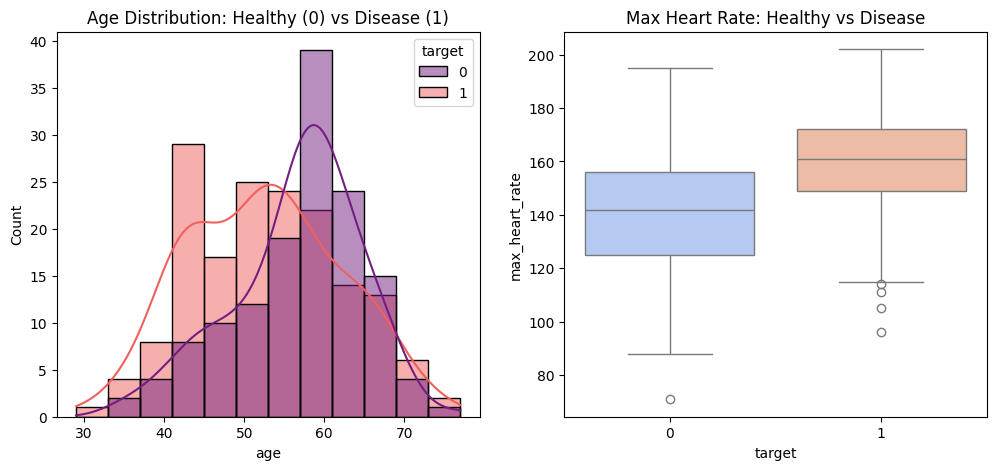

In [9]:
plt.figure(figsize=(12, 5))

# Plot 1: Heart Disease by Age
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', hue='target', kde=True, palette='magma')
plt.title("Age Distribution: Healthy (0) vs Disease (1)")

# Plot 2: Max Heart Rate vs Disease
# Does a lower max heart rate mean trouble?
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='max_heart_rate', data=df, palette='coolwarm')
plt.title("Max Heart Rate: Healthy vs Disease")

plt.show()

# 5. Train/Test Model

Model Accuracy: 81.97%


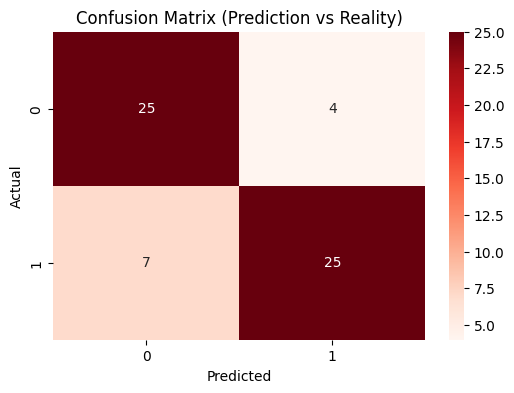

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop('target', axis=1)
y = df['target']

# Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Score
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")

# Confusion Matrix (False Positives vs False Negatives)
# In medicine, a False Negative (Missing a sick person) is dangerous!
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix (Prediction vs Reality)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/tmp/ipython-input-2565204146.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='Reds_r')


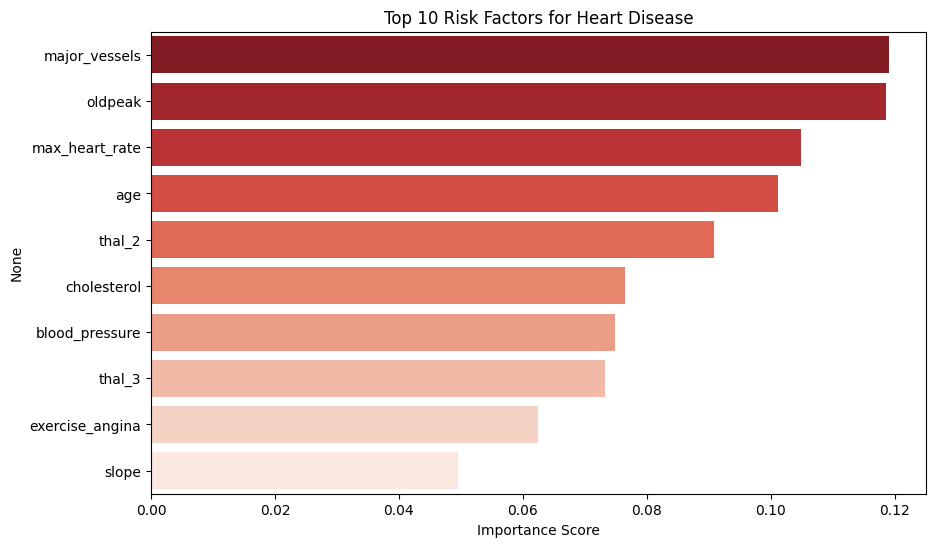

In [11]:
# Get the importance scores from the trained model
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort them to put the most important ones on top
sorted_importances = importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='Reds_r')
plt.title("Top 10 Risk Factors for Heart Disease")
plt.xlabel("Importance Score")
plt.show()

# 6. Lets run a Test

In [13]:
def heart_checkup():
    print("\n--- 🩺 AI DOCTOR CHECKUP ---")

    # We will use random sample inputs for the demo,
    # Let's simulated a High Risk Patient:
    # Age 60, Sex Male(1), BP 145, Chol 233, MaxHR 150

    # Note: We need to match the exact columns from 'X_train' (including the dummy columns)
    # This is a simplified predictor for demonstration.

    # Let's predict on a random patient from the test set to see if we get it right
    random_patient_idx = np.random.randint(0, len(X_test))
    patient_data = X_test.iloc[random_patient_idx].values.reshape(1, -1)
    actual_status = y_test.iloc[random_patient_idx]

    prediction = model.predict(patient_data)[0]
    probability = model.predict_proba(patient_data)[0][1]

    print(f"Patient Data (Random Test Subject):")
    print(f"   Age: {X_test.iloc[random_patient_idx]['age']}")
    print(f"   Cholesterol: {X_test.iloc[random_patient_idx]['cholesterol']}")
    print("-" * 30)

    result = "DETECTED (High Risk)" if prediction == 1 else "HEALTHY (Low Risk)"
    print(f"🤖 AI Diagnosis: {result} ({probability:.1%} confidence)")

    real_result = "Sick" if actual_status == 1 else "Healthy"
    print(f"✅ Real Medical Record: {real_result}")

# Run it 3 times to see different patients
for i in range(3):
    heart_checkup()


--- 🩺 AI DOCTOR CHECKUP ---
Patient Data (Random Test Subject):
   Age: 58
   Cholesterol: 225
------------------------------
🤖 AI Diagnosis: HEALTHY (Low Risk) (7.0% confidence)
✅ Real Medical Record: Healthy

--- 🩺 AI DOCTOR CHECKUP ---
Patient Data (Random Test Subject):
   Age: 40
   Cholesterol: 223
------------------------------
🤖 AI Diagnosis: DETECTED (High Risk) (60.0% confidence)
✅ Real Medical Record: Healthy

--- 🩺 AI DOCTOR CHECKUP ---
Patient Data (Random Test Subject):
   Age: 61
   Cholesterol: 207
------------------------------
🤖 AI Diagnosis: HEALTHY (Low Risk) (7.0% confidence)
✅ Real Medical Record: Healthy


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local